In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler


In [2]:
sheet_names = pd.ExcelFile('E:\DATA\quantinum forage\LLOYDS BANKING GROUP ANALYSIS\Customer_Churn_Data_Large.xlsx').sheet_names 


In [3]:
dfs = [ pd.read_excel('E:\DATA\quantinum forage\LLOYDS BANKING GROUP ANALYSIS\Customer_Churn_Data_Large.xlsx', sheet_name=sheet) for sheet in sheet_names ] 


In [4]:
df_cd = dfs[0]
df_th = dfs[1]
df_cs = dfs[2]      
df_oa = dfs[3]
df_churn = dfs[4]


In [5]:
df_cd

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
0,1,62,M,Single,Low
1,2,65,M,Married,Low
2,3,18,M,Single,Low
3,4,21,M,Widowed,Low
4,5,21,M,Divorced,Medium
...,...,...,...,...,...
995,996,54,F,Single,Low
996,997,19,M,Widowed,High
997,998,47,M,Married,Low
998,999,23,M,Widowed,High


In [6]:
print( df_churn.shape )
print( df_cd.shape )
print( df_cs.shape )
print( df_oa.shape )
print( df_th.shape )


(1000, 2)
(1000, 5)
(1002, 5)
(1000, 4)
(5054, 5)


In [7]:
df_th

,CustomerID,TransactionID,TransactionDate,AmountSpent,ProductCategory
0,1,7194,2022-03-27,416.50,Electronics
1,2,7250,2022-08-08,54.96,Clothing
2,2,9660,2022-07-25,197.50,Electronics
3,2,2998,2022-01-25,101.31,Furniture
4,2,1228,2022-07-24,397.37,Clothing
...,...,...,...,...,...
5049,1000,2724,2022-09-08,232.06,Groceries
5050,1000,2917,2022-12-13,324.98,Books
5051,1000,2979,2022-06-15,375.34,Groceries
5052,1000,8594,2022-04-08,166.73,Books


In [8]:
df_th = df_th.groupby( 'CustomerID').agg( total_amount =
                                  ('AmountSpent' , 'sum' ) ,
                                  countoftransaction = ('CustomerID' , 'count') 

                                  ).reset_index() 

In [9]:
df_th 

,CustomerID,total_amount,countoftransaction
0,1,416.50,1
1,2,1547.42,7
2,3,1702.98,6
3,4,917.29,5
4,5,2001.49,8
...,...,...,...
995,996,227.25,1
996,997,419.82,2
997,998,252.15,1
998,999,2393.26,9


In [10]:
print(df_churn['CustomerID'].nunique())
print(df_cd['CustomerID'].nunique())
print(df_cs['CustomerID'].nunique())
print(df_oa['CustomerID'].nunique())

1000
1000
668
1000


In [11]:
# the transaction history column  has 5000+ rows and the dat that it hold is not useful for us
# we will drop it


In [12]:
df_final = df_cd.merge(df_churn , on = 'CustomerID' , how = 'left') \
                .merge(df_th  , on = 'CustomerID' , how = 'left') \
                .merge(df_oa , on = 'CustomerID' , how = 'left') \
                .merge(df_cs , on = 'CustomerID' , how = 'left')   


In [13]:
df_final.shape

(1334, 15)

In [14]:
df_final.duplicated().sum() 

np.int64(0)

In [15]:
df_final.columns
# we have combined the dat from all the sheets and now we will drop the unwanted columsn which don't have any information 


Index(['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'IncomeLevel',
       'ChurnStatus', 'total_amount', 'countoftransaction', 'LastLoginDate',
       'LoginFrequency', 'ServiceUsage', 'InteractionID', 'InteractionDate',
       'InteractionType', 'ResolutionStatus'],
      dtype='object')

In [17]:
# the columsn like transaction date , transaction id  
#  interaction , data , intereaction id 
# gender  , are irrelevent and we will drop them 


In [18]:
# checking for missing values 
df_final.isnull().sum()

CustomerID              0
Age                     0
Gender                  0
MaritalStatus           0
IncomeLevel             0
ChurnStatus             0
total_amount            0
countoftransaction      0
LastLoginDate           0
LoginFrequency          0
ServiceUsage            0
InteractionID         332
InteractionDate       332
InteractionType       332
ResolutionStatus      332
dtype: int64

In [19]:
df_final

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,ChurnStatus,total_amount,countoftransaction,LastLoginDate,LoginFrequency,ServiceUsage,InteractionID,InteractionDate,InteractionType,ResolutionStatus
0,1,62,M,Single,Low,0,416.50,1,2023-10-21,34,Mobile App,6363.0,2022-03-31,Inquiry,Resolved
1,2,65,M,Married,Low,1,1547.42,7,2023-12-05,5,Website,3329.0,2022-03-17,Inquiry,Resolved
2,3,18,M,Single,Low,0,1702.98,6,2023-11-15,3,Website,9976.0,2022-08-24,Inquiry,Resolved
3,4,21,M,Widowed,Low,0,917.29,5,2023-08-25,2,Website,7354.0,2022-11-18,Inquiry,Resolved
4,4,21,M,Widowed,Low,0,917.29,5,2023-08-25,2,Website,5393.0,2022-07-03,Inquiry,Unresolved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,996,54,F,Single,Low,0,227.25,1,2023-01-29,38,Mobile App,NaN,NaT,NaN,NaN
1330,997,19,M,Widowed,High,0,419.82,2,2023-04-01,5,Mobile App,NaN,NaT,NaN,NaN
1331,998,47,M,Married,Low,0,252.15,1,2023-07-10,47,Website,NaN,NaT,NaN,NaN
1332,999,23,M,Widowed,High,0,2393.26,9,2023-01-08,23,Website,NaN,NaT,NaN,NaN


In [ ]:
df_final.drop(columns = [ 'InteractionDate'  , 'InteractionID' ,'InteractionType' ,'LastLoginDate' ] , inplace = True )  
#we will drop use less columns 

In [21]:
df_final.columns 
# only relevant columns are left now 

Index(['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'IncomeLevel',
       'ChurnStatus', 'total_amount', 'countoftransaction', 'LoginFrequency',
       'ServiceUsage', 'ResolutionStatus'],
      dtype='object')

In [22]:
df_final

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,ChurnStatus,total_amount,countoftransaction,LoginFrequency,ServiceUsage,ResolutionStatus
0,1,62,M,Single,Low,0,416.50,1,34,Mobile App,Resolved
1,2,65,M,Married,Low,1,1547.42,7,5,Website,Resolved
2,3,18,M,Single,Low,0,1702.98,6,3,Website,Resolved
3,4,21,M,Widowed,Low,0,917.29,5,2,Website,Resolved
4,4,21,M,Widowed,Low,0,917.29,5,2,Website,Unresolved
...,...,...,...,...,...,...,...,...,...,...,...
1329,996,54,F,Single,Low,0,227.25,1,38,Mobile App,NaN
1330,997,19,M,Widowed,High,0,419.82,2,5,Mobile App,NaN
1331,998,47,M,Married,Low,0,252.15,1,47,Website,NaN
1332,999,23,M,Widowed,High,0,2393.26,9,23,Website,NaN


In [23]:
# we will fill the missing values of resolution status  with no problem  
df_final['ResolutionStatus'].fillna('No Problem', inplace=True)

C:\Users\Ayush\AppData\Local\Temp\ipykernel_3312\983418897.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['ResolutionStatus'].fillna('No Problem', inplace=True)


In [24]:
# now we will replace resolved and noproblem  

## EDA 


In [25]:
df_final['CustomerID'].nunique() 

1000

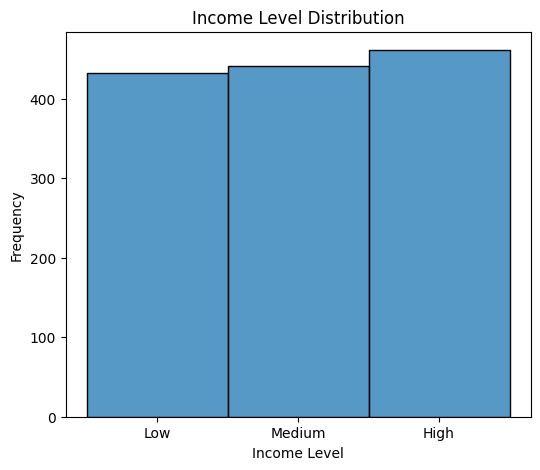

IncomeLevel
High      461
Medium    441
Low       432
Name: count, dtype: int64


In [26]:
# histogram for income column 
plt.figure(figsize=(6 , 5 ))
sns.histplot(df_final['IncomeLevel'] ) 
plt.title('Income Level Distribution')
plt.xlabel('Income Level')
plt.ylabel('Frequency')
plt.show() 
print( df_final['IncomeLevel'].value_counts())

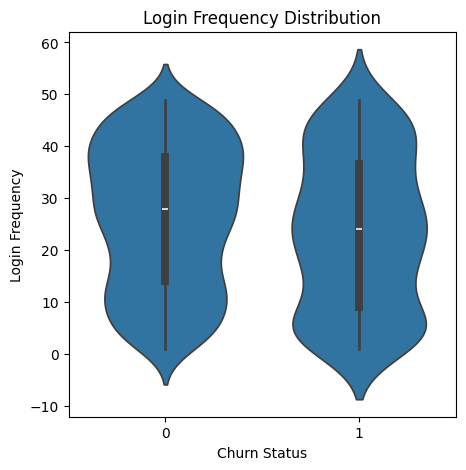

In [27]:
# violin plot for LoginFrequency
plt.figure(figsize=(5, 5))
sns.violinplot(x='ChurnStatus' , y = 'LoginFrequency'  , data=df_final )
plt.title('Login Frequency Distribution')
plt.xlabel('Churn Status')
plt.ylabel('Login Frequency')
plt.show() 

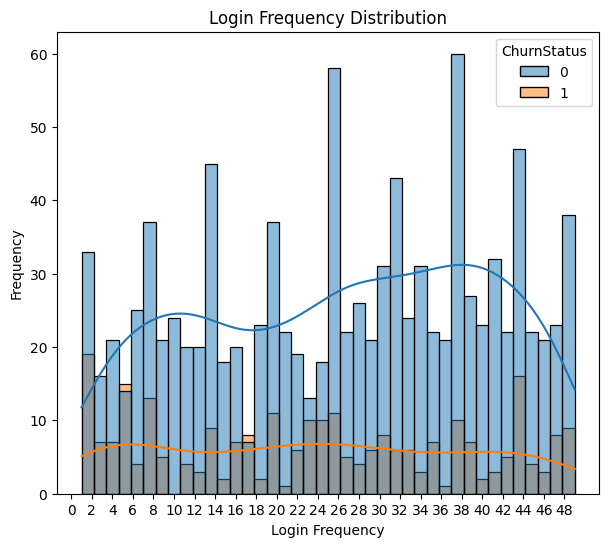

In [28]:
# histogram for login frequqncy 
plt.figure(figsize=(7, 6))
sns.histplot( data = df_final , x = 'LoginFrequency' ,  bins=40 , kde=True , hue = 'ChurnStatus' )  
plt.title('Login Frequency Distribution')
plt.xlabel('Login Frequency')
plt.ylabel('Frequency')
plt.xticks( np.arange( 0 ,50 , 2 )   )
plt.show()


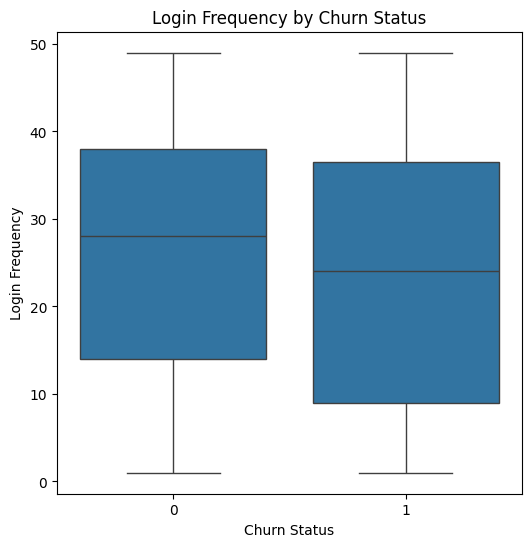

In [29]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df_final, x='ChurnStatus', y='LoginFrequency')
plt.title('Login Frequency by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Login Frequency')
plt.show()

# the people who are not leaving ar have higher login frequnce on an average 



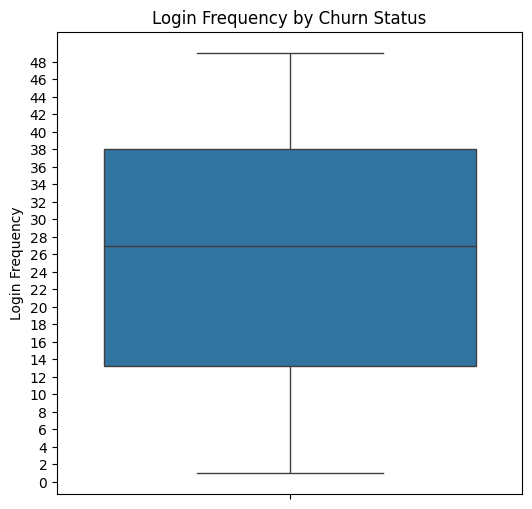

In [30]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df_final, y = 'LoginFrequency')
plt.title('Login Frequency by Churn Status')
plt.ylabel('Login Frequency')
plt.yticks( np.arange( 0 ,50 , 2 )   )
plt.show()


e:\DATA\quantinum forage\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


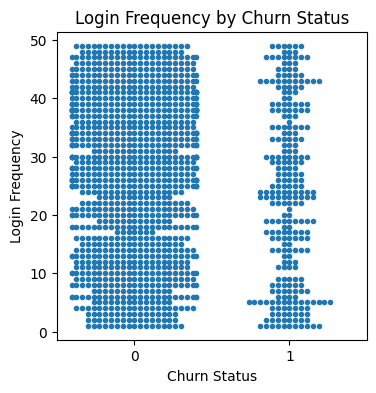

In [31]:
plt.figure(figsize=(4, 4))
sns.swarmplot(data=df_final, x='ChurnStatus', y='LoginFrequency' , size =4  )
plt.title('Login Frequency by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Login Frequency')
plt.show()
# the people who are  leaving have lower  login frequency 


25 % quartile : 30.0       50 % quartile : 43.0         75 % quartile: 56.0


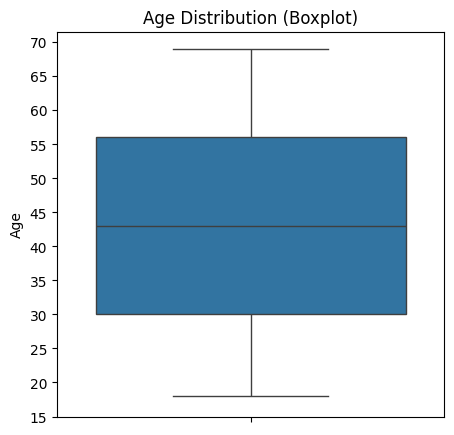

In [32]:
# box plot and histogram for age 
q1 = df_final['Age'].quantile(0.25)
q2 = df_final['Age'].quantile(0.50)
q3 = df_final['Age'].quantile(0.75)
print( "25 % quartile :" , q1 , "      50 % quartile :"  , q2 ,  "        75 % quartile:"  , q3 )

plt.figure(figsize=(5, 5))
sns.boxplot(data=df_final, y='Age')
plt.title('Age Distribution (Boxplot)')
plt.ylabel('Age')
plt.yticks( np.arange( 15, 75 , 5  ) ) 
plt.show()


## bi variate analysis using the target variable 

<Axes: xlabel='ChurnStatus', ylabel='Age'>

e:\DATA\quantinum forage\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


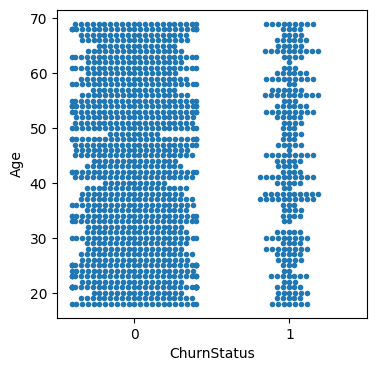

In [33]:
# swarm plot for churn vs age 
plt.figure( figsize= ( 4 ,4 ))
sns.swarmplot( data = df_final , x = 'ChurnStatus'  , y = 'Age'  , size = 4 )



<Axes: xlabel='ChurnStatus', ylabel='Age'>

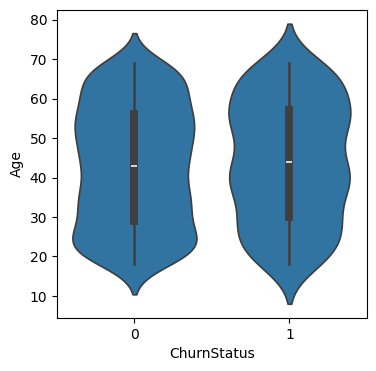

In [34]:
plt.figure(  figsize = ( 4 ,4 ) )
sns.violinplot(  x = 'ChurnStatus' , y = 'Age' , data = df_final ) 

<Axes: xlabel='Age', ylabel='Count'>

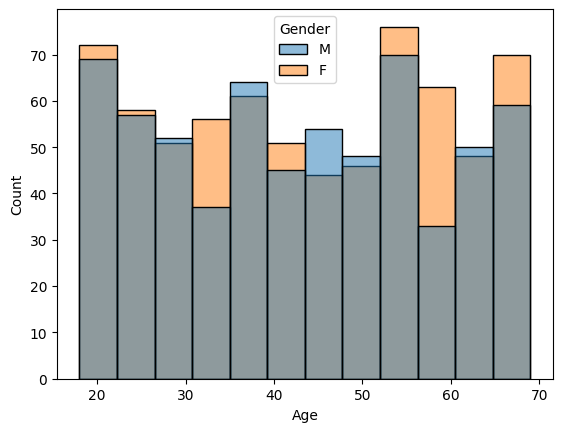

In [ ]:
plt.Figure( figsize= ( 4 , 4 ))
sns.histplot(data=df_final , x = 'Age' , hue = 'Gender' )  # split by category (optional)


## categorical vs target variable 

<Axes: xlabel='Gender', ylabel='count'>

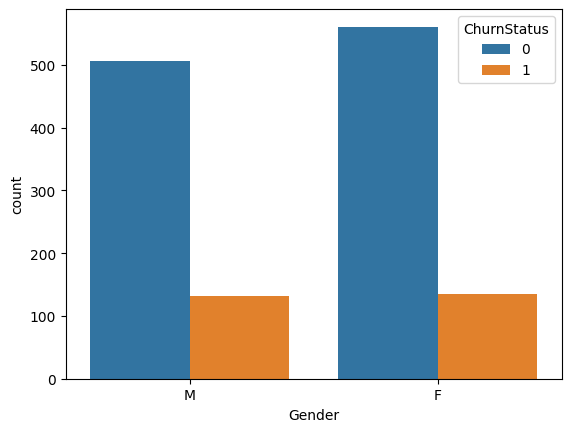

In [36]:
plt.Figure( figsize= ( 4 , 4 ))
sns.countplot( data = df_final  , x = 'Gender'  , hue = 'ChurnStatus'  )

<Axes: xlabel='Gender'>

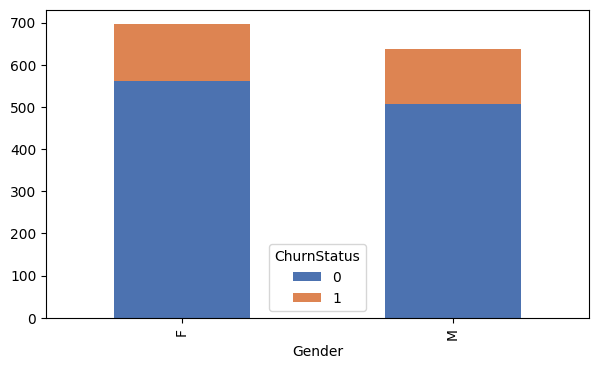

In [37]:
counts = pd.crosstab(df_final['Gender'], df_final['ChurnStatus'])

# Plot stacked bar chart (normal, not 100%)
counts.plot(kind='bar', stacked=True, figsize=(7,4), color=['#4C72B0', '#DD8452'])


In [38]:
## 100 percent stacked bar chart for marital status  vs churnstatus 
crosstab = pd.crosstab( df_final['MaritalStatus'] , df_final['ChurnStatus'] )  
crosstab2 = pd.crosstab( df_final['ResolutionStatus'] , df_final['ChurnStatus'] )  
crosstab3 = pd.crosstab( df_final['IncomeLevel'] , df_final['ChurnStatus'] )  



In [39]:
crosstab2

ChurnStatus,0,1
ResolutionStatus,,
No Problem,271,61
Resolved,416,107
Unresolved,380,99


In [40]:
proportion = crosstab.div( crosstab.sum(axis =1 )  , axis = 0 ) 
proportion2 = crosstab2.div( crosstab2.sum(axis =1 )  , axis = 0 ) 
proportion3 = crosstab3.div( crosstab3.sum(axis =1 )  , axis = 0 ) 

In [41]:
proportion3 

ChurnStatus,0,1
IncomeLevel,,
High,0.815618,0.184382
Low,0.787037,0.212963
Medium,0.795918,0.204082


In [42]:
proportion2

ChurnStatus,0,1
ResolutionStatus,,
No Problem,0.816265,0.183735
Resolved,0.795411,0.204589
Unresolved,0.793319,0.206681


<Axes: xlabel='MaritalStatus'>

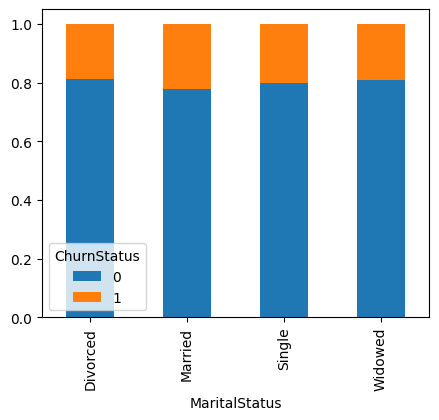

In [43]:
proportion.plot( kind = 'bar'  , stacked= True  ,  figsize=( 5, 4 ) )

# the churn rate across all of them is almost equal nothing to find out from  here 

<Axes: xlabel='ResolutionStatus'>

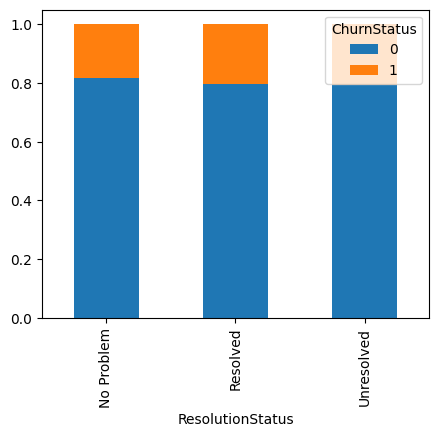

In [44]:
proportion2.plot( kind = 'bar'  , stacked= True  ,  figsize=( 5, 4 ) )


<Axes: xlabel='IncomeLevel'>

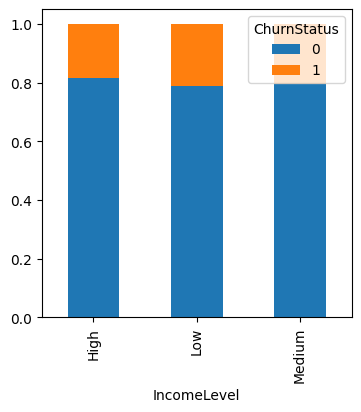

In [45]:
proportion3.plot( kind= 'bar'  , stacked = True  , figsize = ( 4 , 4 )  )

## numerical vs target 

In [46]:
df_final

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,ChurnStatus,total_amount,countoftransaction,LoginFrequency,ServiceUsage,ResolutionStatus
0,1,62,M,Single,Low,0,416.50,1,34,Mobile App,Resolved
1,2,65,M,Married,Low,1,1547.42,7,5,Website,Resolved
2,3,18,M,Single,Low,0,1702.98,6,3,Website,Resolved
3,4,21,M,Widowed,Low,0,917.29,5,2,Website,Resolved
4,4,21,M,Widowed,Low,0,917.29,5,2,Website,Unresolved
...,...,...,...,...,...,...,...,...,...,...,...
1329,996,54,F,Single,Low,0,227.25,1,38,Mobile App,No Problem
1330,997,19,M,Widowed,High,0,419.82,2,5,Mobile App,No Problem
1331,998,47,M,Married,Low,0,252.15,1,47,Website,No Problem
1332,999,23,M,Widowed,High,0,2393.26,9,23,Website,No Problem


In [47]:
# churn status  vs incoem level 
df_final.columns

Index(['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'IncomeLevel',
       'ChurnStatus', 'total_amount', 'countoftransaction', 'LoginFrequency',
       'ServiceUsage', 'ResolutionStatus'],
      dtype='object')

<Axes: xlabel='ChurnStatus', ylabel='LoginFrequency'>

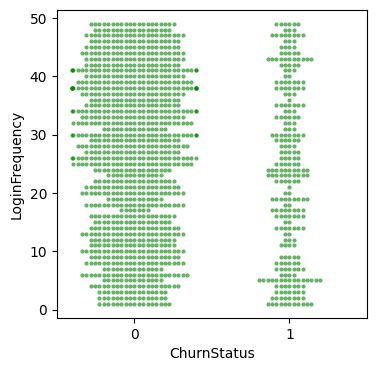

In [48]:
plt.figure( figsize= ( 4 , 4 ))
sns.swarmplot(x='ChurnStatus', y='LoginFrequency', data=df_final, color='g', size=3, alpha=0.6)
# people with t=less login frequency are leaving 


<Axes: xlabel='LoginFrequency', ylabel='Density'>

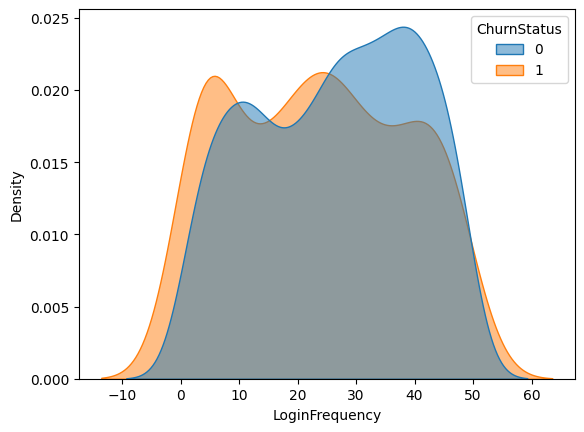

In [49]:
sns.kdeplot(data=df_final, x='LoginFrequency', hue='ChurnStatus', fill=True, common_norm=False, alpha=0.5) 

<Axes: xlabel='countoftransaction', ylabel='Density'>

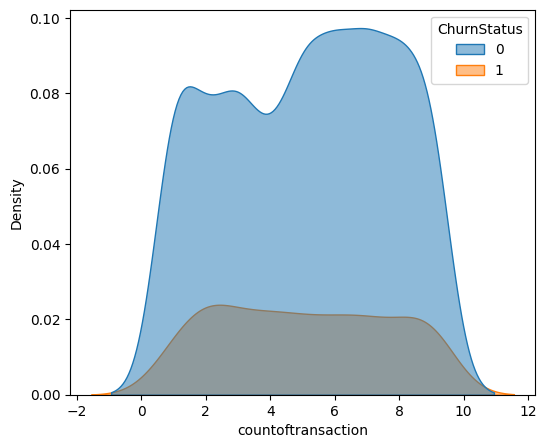

In [50]:
plt.figure( figsize = ( 6 , 5 ))
sns.kdeplot( data = df_final ,  x = 'countoftransaction'  , hue = 'ChurnStatus'  ,  fill = True , alpha = 0.5 )

<Axes: xlabel='countoftransaction', ylabel='Count'>

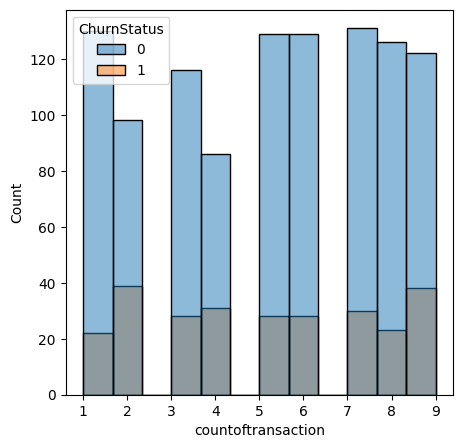

In [51]:
plt.figure( figsize = ( 5 , 5 ))
sns.histplot( data = df_final ,  x = 'countoftransaction'  , hue = 'ChurnStatus'  ,  fill = True , alpha = 0.5 )

<Axes: xlabel='total_amount', ylabel='Density'>

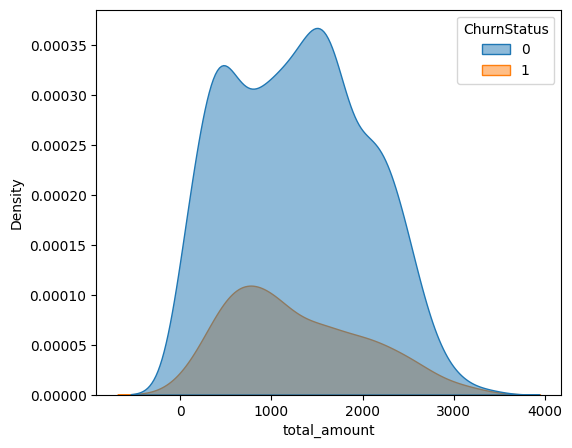

In [52]:
plt.figure( figsize = ( 6 , 5 ))
sns.kdeplot( data = df_final ,  x = 'total_amount'  , hue = 'ChurnStatus'  ,  fill = True , alpha = 0.5 )

<Axes: xlabel='ChurnStatus', ylabel='total_amount'>

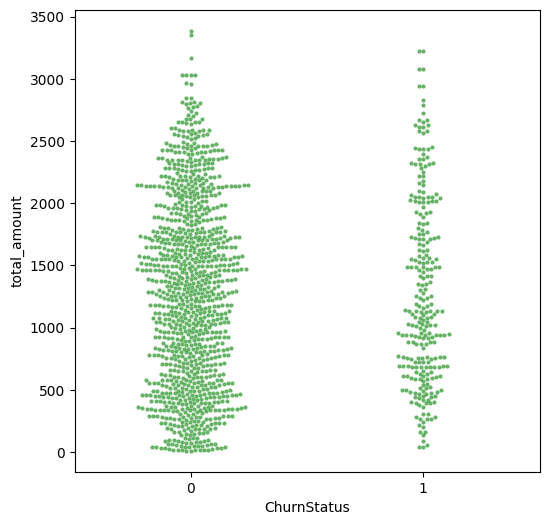

In [53]:
plt.figure( figsize= ( 6 , 6 ))
sns.swarmplot(x='ChurnStatus', y='total_amount', data=df_final, color='g', size=3, alpha=0.6)


<Axes: xlabel='ChurnStatus', ylabel='total_amount'>

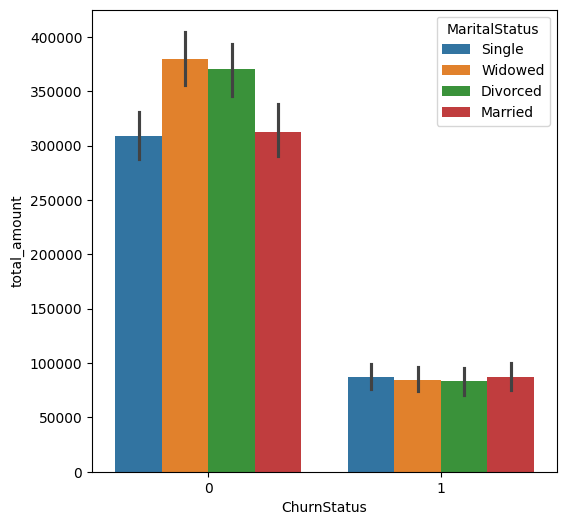

In [54]:
plt.figure( figsize= ( 6 , 6 ))
sns.barplot( data = df_final ,  x =  'ChurnStatus'  , y = 'total_amount'  , hue = 'MaritalStatus' , estimator = sum ) 

In [55]:
'''['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'IncomeLevel',
       'ChurnStatus', 'total_amount', 'countoftransaction', 'LoginFrequency',
       'ServiceUsage', 'ResolutionStatus'] '''


"['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'IncomeLevel',\n       'ChurnStatus', 'total_amount', 'countoftransaction', 'LoginFrequency',\n       'ServiceUsage', 'ResolutionStatus'] "

<Axes: xlabel='countoftransaction', ylabel='total_amount'>

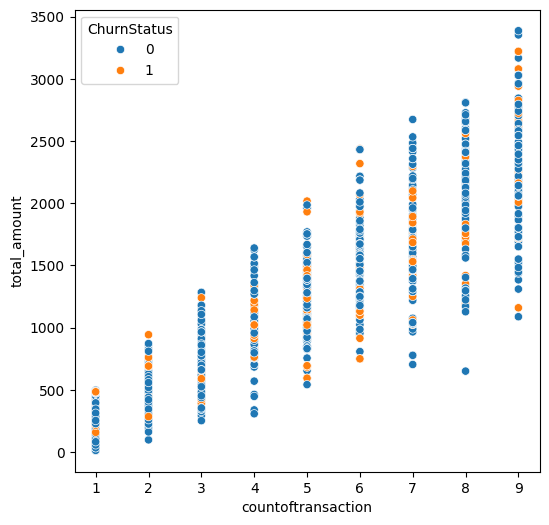

In [56]:
plt.figure( figsize= ( 6 , 6 ))
sns.scatterplot( data = df_final ,  x =  'countoftransaction' , y = 'total_amount'  , hue = 'ChurnStatus' ) 

<Axes: xlabel='ResolutionStatus', ylabel='count'>

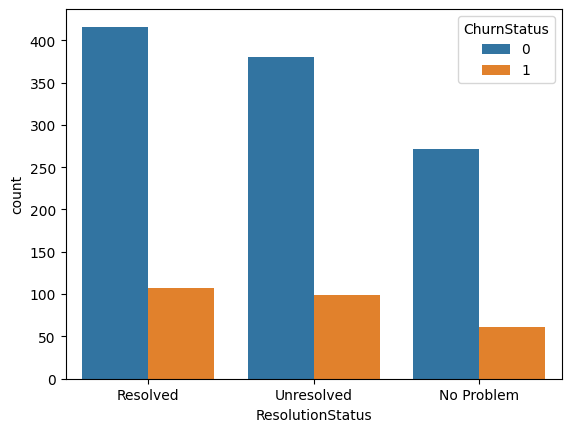

In [57]:
sns.countplot(data=df_final , x = 'ResolutionStatus',  hue = 'ChurnStatus' ) 


In [58]:
django = pd.crosstab( df_final['ResolutionStatus'] ,  df_final['ChurnStatus'] ) 

In [59]:
django  

ChurnStatus,0,1
ResolutionStatus,,
No Problem,271,61
Resolved,416,107
Unresolved,380,99


In [60]:
django_normal = django.div( django.sum(axis= 1 )  , axis = 0 )

In [61]:
django_normal  

ChurnStatus,0,1
ResolutionStatus,,
No Problem,0.816265,0.183735
Resolved,0.795411,0.204589
Unresolved,0.793319,0.206681


<Axes: xlabel='ResolutionStatus'>

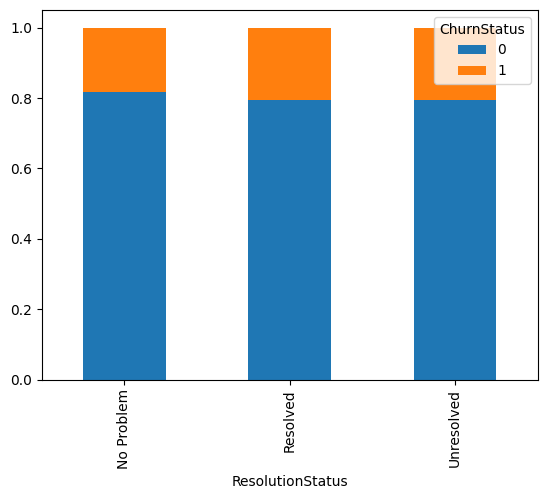

In [62]:
django_normal.plot( kind = 'bar'  , stacked = True )

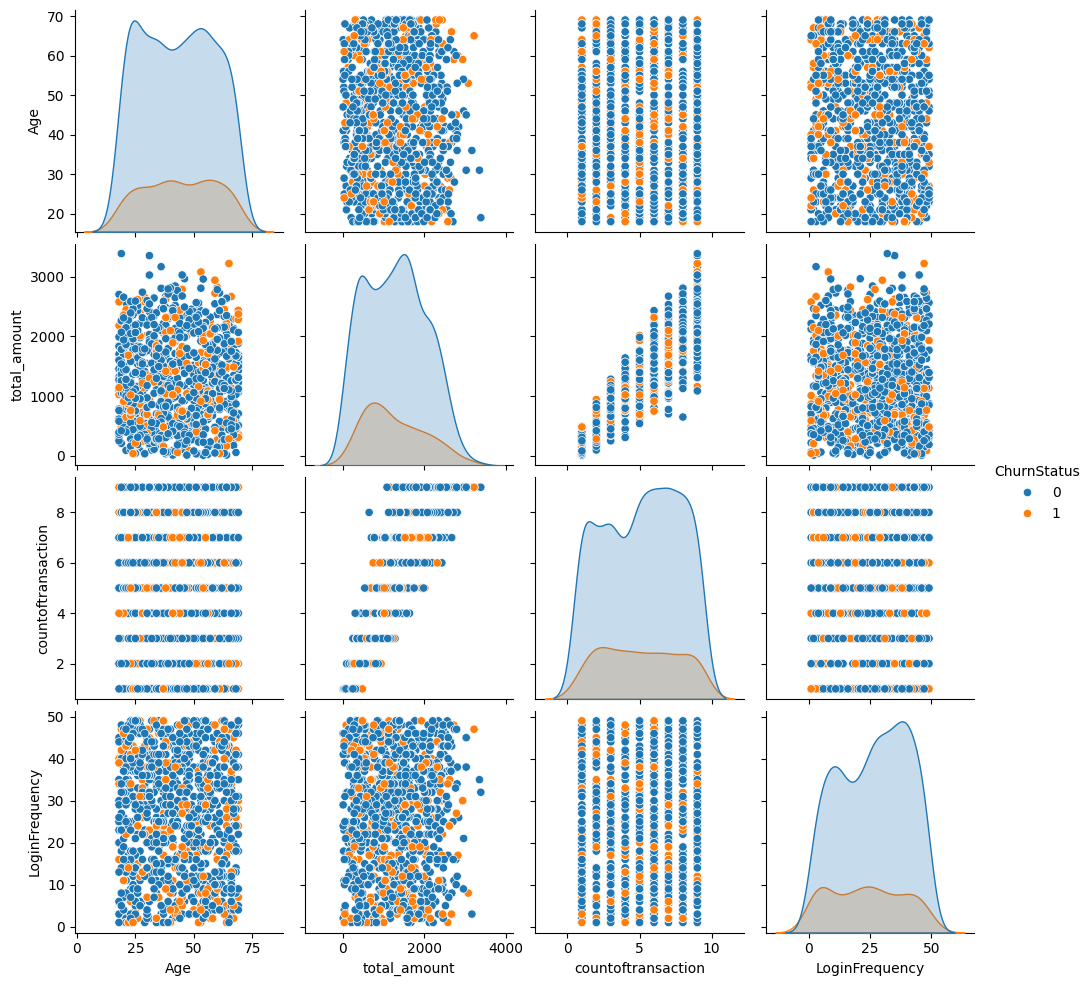

In [63]:
numeric_cols = [
    'Age', 'total_amount', 'countoftransaction',
    'LoginFrequency'
]

sns.pairplot(df_final[numeric_cols + ['ChurnStatus']], hue='ChurnStatus')



Text(0, 0.5, 'Total Amount Spent')

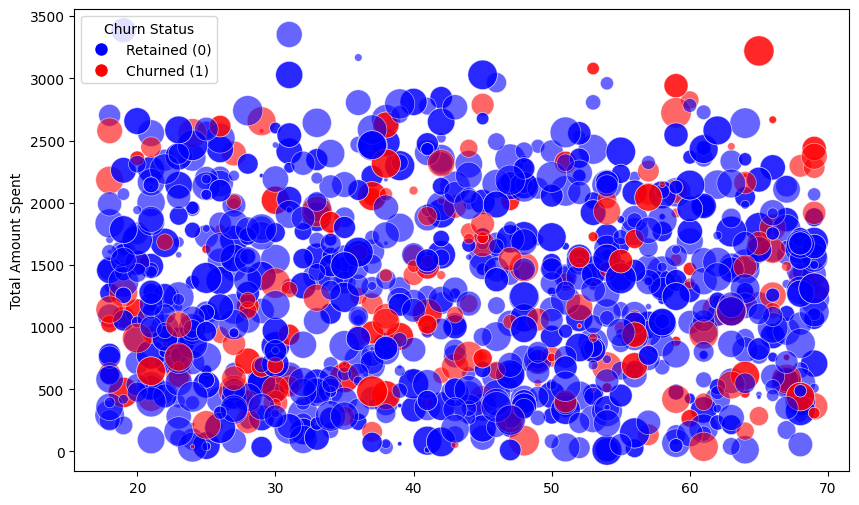

In [64]:
palette = {0: 'blue', 1: 'red'}

plt.figure(figsize=(10, 6))
scatter = plt.scatter( 
    df_final['Age'] ,
    df_final['total_amount'],
    s=df_final['LoginFrequency'] * 10,  # Adjust multiplier for visible bubble sizes
    c=df_final['ChurnStatus'].map(palette),
    alpha=0.6,
    edgecolors='w',
    linewidth=0.5
)

# Custom legend for ChurnStatus

from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Retained (0)', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Churned (1)', markerfacecolor='red', markersize=10)
]

plt.legend(handles=legend_elements, title="Churn Status")
plt.ylabel('Total Amount Spent')

# we are losing low spending young customers


<Axes: >

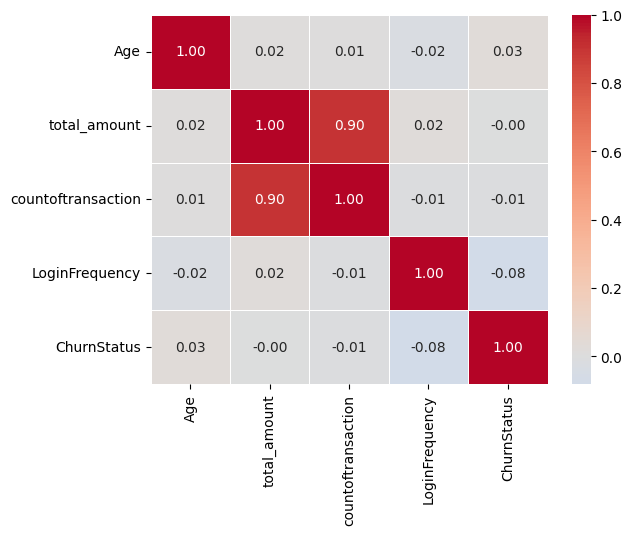

In [65]:
corr_matrix = df_final[numeric_cols + ['ChurnStatus']].corr(method='pearson')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=.5, fmt=".2f")



In [66]:
from scipy.stats import pointbiserialr

# List your numeric columns

correlations = {}
for col in numeric_cols:
    corr, _ = pointbiserialr(df_final['ChurnStatus'], df_final[col])
    correlations[col] = corr

# Convert to DataFrame for plotting
corr_df = pd.DataFrame(list(correlations.items()), columns=['Variable', 'PointBiserialCorrelation'])
corr_df = corr_df.sort_values('PointBiserialCorrelation', key=abs, ascending=False)


In [67]:
corr_df

,Variable,PointBiserialCorrelation
3,LoginFrequency,-0.081590
0,Age,0.029586
2,countoftransaction,-0.008218
1,total_amount,-0.002244


C:\Users\Ayush\AppData\Local\Temp\ipykernel_3312\1030485422.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


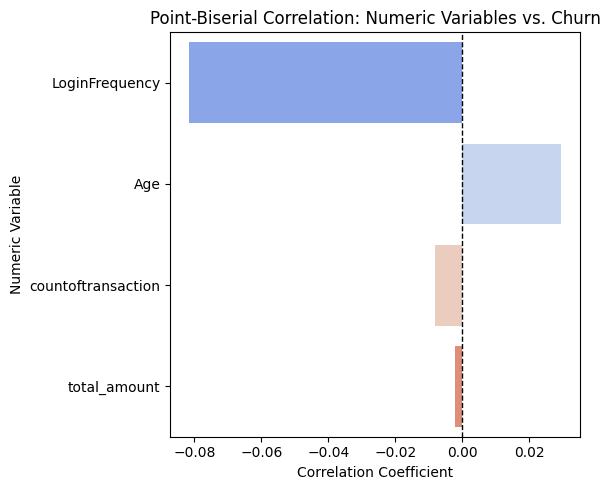

In [68]:
plt.figure(figsize=(6, 5))
sns.barplot(
    data=corr_df,
    x='PointBiserialCorrelation',
    y='Variable',
    palette='coolwarm',
    orient='h'
)
plt.title('Point-Biserial Correlation: Numeric Variables vs. Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Numeric Variable')
plt.axvline(0, color='k', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()


In [69]:
df_final.columns

Index(['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'IncomeLevel',
       'ChurnStatus', 'total_amount', 'countoftransaction', 'LoginFrequency',
       'ServiceUsage', 'ResolutionStatus'],
      dtype='object')

## outliers  , imputing etc 


<Axes: xlabel='total_amount', ylabel='Count'>

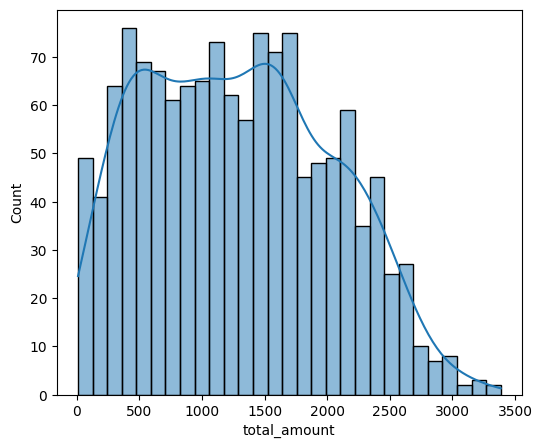

In [70]:
plt.figure(figsize=(6, 5))
sns.histplot( data = df_final  , x ='total_amount' , bins = 29 , kde= True )

In [88]:
from sklearn.preprocessing import PowerTransformer

# For strictly positive data (Box-Cox)
pt = PowerTransformer(method='box-cox')
df_final['total_amount_bc'] = pt.fit_transform(df_final[['total_amount']])


<Axes: xlabel='total_amount_bc', ylabel='Count'>

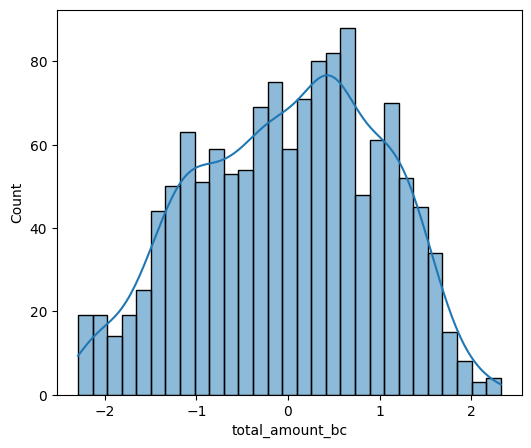

In [89]:
plt.figure(figsize=(6, 5))
sns.histplot( data = df_final  , x ='total_amount_bc' , bins = 29 , kde= True )

<Axes: xlabel='countoftransaction', ylabel='Count'>

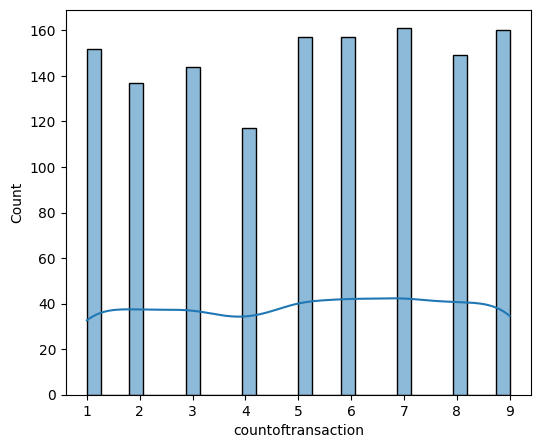

In [85]:
plt.figure(figsize=(6, 5))
sns.histplot( data = df_final  , x ='countoftransaction' , bins = 30, kde= True )

<Axes: xlabel='LoginFrequency', ylabel='Count'>

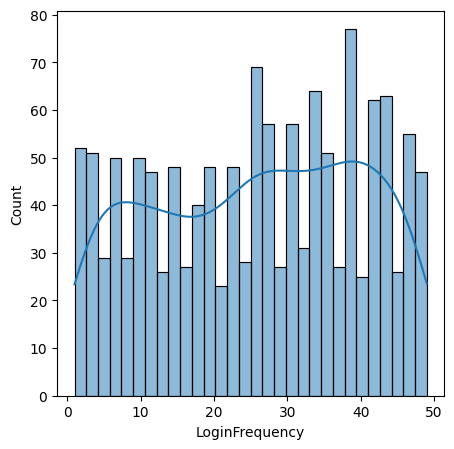

In [82]:
plt.figure(figsize=(5, 5))
sns.histplot( data = df_final  , x ='LoginFrequency' , bins = 30, kde= True )

<Axes: xlabel='Age', ylabel='Count'>

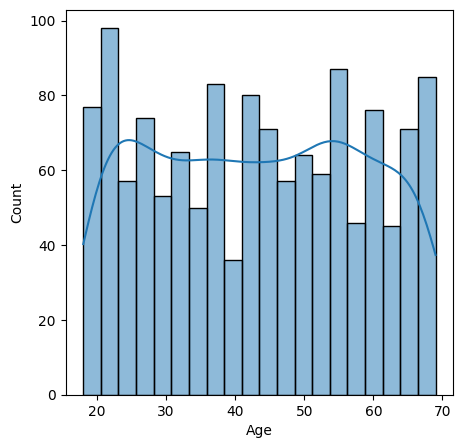

In [84]:
plt.figure(figsize=(5, 5))
sns.histplot( data = df_final  , x ='Age' , bins = 20, kde= True )

In [74]:
from scipy.stats import zscore

# List your numeric columns
numeric_cols = [
     'total_amount', 'countoftransaction',
    'LoginFrequency' 
]

outlier_results = {}

for col in numeric_cols:
    data = pd.to_numeric(df_final[col], errors='coerce').dropna()
    # IQR Method
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    iqr_outliers = (data < lower_bound) | (data > upper_bound)
    
    # Z-score Method
    z_scores = zscore(data)
    z_outliers = np.abs(z_scores) > 3
    
    # Combine outlier indices
    outlier_indices_iqr = data.index[iqr_outliers].tolist()
    outlier_indices_z = data.index[z_outliers].tolist()
    
    outlier_results[col] = {
        'iqr_outlier_indices': outlier_indices_iqr,
        'zscore_outlier_indices': outlier_indices_z,
        'num_iqr_outliers': len(outlier_indices_iqr),
        'num_zscore_outliers': len(outlier_indices_z),
    }
    print(f"{col} - IQR: {len(outlier_indices_iqr)} outliers, Z-score: {len(outlier_indices_z)} outliers")

# Example: To view outlier rows for a specific column using IQR
# df_final.loc[outlier_results['total_amount']['iqr_outlier_indices']]


total_amount - IQR: 0 outliers, Z-score: 0 outliers
countoftransaction - IQR: 0 outliers, Z-score: 0 outliers
LoginFrequency - IQR: 0 outliers, Z-score: 0 outliers


In [78]:
df_final.drop( columns= ['total_amount_log'] , inplace= True )


In [91]:
df_final

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,ChurnStatus,total_amount,countoftransaction,LoginFrequency,ServiceUsage,ResolutionStatus,total_amount_bc
0,1,62,M,Single,Low,0,416.50,1,34,Mobile App,Resolved,-1.190164
1,2,65,M,Married,Low,1,1547.42,7,5,Website,Resolved,0.438220
2,3,18,M,Single,Low,0,1702.98,6,3,Website,Resolved,0.620633
3,4,21,M,Widowed,Low,0,917.29,5,2,Website,Resolved,-0.379692
4,4,21,M,Widowed,Low,0,917.29,5,2,Website,Unresolved,-0.379692
...,...,...,...,...,...,...,...,...,...,...,...,...
1329,996,54,F,Single,Low,0,227.25,1,38,Mobile App,No Problem,-1.583220
1330,997,19,M,Widowed,High,0,419.82,2,5,Mobile App,No Problem,-1.183914
1331,998,47,M,Married,Low,0,252.15,1,47,Website,No Problem,-1.526292
1332,999,23,M,Widowed,High,0,2393.26,9,23,Website,No Problem,1.368873


In [ ]:

cols_to_scale = ['Age', 'total_amount_bc', 'LoginFrequency', 'countoftransaction']

scaler = StandardScaler()
x_scaled = scaler.fit_transform( df_final[cols_to_scale]) 


In [ ]:
xsdf = pd.DataFrame( x_scaled  , columns= [ col +'_scaled'  for col in cols_to_scale ] , index = df_final.index ) 

In [94]:
xsdf

,Age_scaled,total_amount_bc_scaled,LoginFrequency_scaled,countoftransaction_scaled
0,1.230463,-1.190164,0.586338,-1.57704
1,1.426909,0.438220,-1.478762,0.72720
2,-1.650745,0.620633,-1.621183,0.34316
3,-1.454299,-0.379692,-1.692393,-0.04088
4,-1.454299,-0.379692,-1.692393,-0.04088
...,...,...,...,...
1329,0.706607,-1.583220,0.871179,-1.57704
1330,-1.585263,-1.183914,-1.478762,-1.19300
1331,0.248233,-1.526292,1.512072,-1.57704
1332,-1.323335,1.368873,-0.196976,1.49528


In [ ]:
df_final = pd.concat([df_final, xsdf], axis=1 )


In [99]:
df_final.drop( columns = cols_to_scale +['total_amount']  , inplace= True )

In [100]:
df_final

,CustomerID,Gender,MaritalStatus,IncomeLevel,ChurnStatus,ServiceUsage,ResolutionStatus,Age_scaled,total_amount_bc_scaled,LoginFrequency_scaled,countoftransaction_scaled
0,1,M,Single,Low,0,Mobile App,Resolved,1.230463,-1.190164,0.586338,-1.57704
1,2,M,Married,Low,1,Website,Resolved,1.426909,0.438220,-1.478762,0.72720
2,3,M,Single,Low,0,Website,Resolved,-1.650745,0.620633,-1.621183,0.34316
3,4,M,Widowed,Low,0,Website,Resolved,-1.454299,-0.379692,-1.692393,-0.04088
4,4,M,Widowed,Low,0,Website,Unresolved,-1.454299,-0.379692,-1.692393,-0.04088
...,...,...,...,...,...,...,...,...,...,...,...
1329,996,F,Single,Low,0,Mobile App,No Problem,0.706607,-1.583220,0.871179,-1.57704
1330,997,M,Widowed,High,0,Mobile App,No Problem,-1.585263,-1.183914,-1.478762,-1.19300
1331,998,M,Married,Low,0,Website,No Problem,0.248233,-1.526292,1.512072,-1.57704
1332,999,M,Widowed,High,0,Website,No Problem,-1.323335,1.368873,-0.196976,1.49528


In [101]:
cat_cols = ['Gender' , 'MaritalStatus'  ,'IncomeLevel' , 'ServiceUsage' ,'ResolutionStatus'   ]

dummies = pd.get_dummies( df_final[cat_cols]  , prefix= 'cat_') 



In [103]:
df_final = pd.concat( [df_final ,dummies]  , axis =1 ) 

In [108]:
df_final.drop( columns=cat_cols , inplace=True )

In [111]:
df_model = df_final.drop( columns = ['CustomerID'] )

In [112]:
df_model 

,ChurnStatus,Age_scaled,total_amount_bc_scaled,LoginFrequency_scaled,countoftransaction_scaled,cat__F,cat__M,cat__Divorced,cat__Married,cat__Single,cat__Widowed,cat__High,cat__Low,cat__Medium,cat__Mobile App,cat__Online Banking,cat__Website,cat__No Problem,cat__Resolved,cat__Unresolved
0,0,1.230463,-1.190164,0.586338,-1.57704,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False
1,1,1.426909,0.438220,-1.478762,0.72720,False,True,False,True,False,False,False,True,False,False,False,True,False,True,False
2,0,-1.650745,0.620633,-1.621183,0.34316,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False
3,0,-1.454299,-0.379692,-1.692393,-0.04088,False,True,False,False,False,True,False,True,False,False,False,True,False,True,False
4,0,-1.454299,-0.379692,-1.692393,-0.04088,False,True,False,False,False,True,False,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,0,0.706607,-1.583220,0.871179,-1.57704,True,False,False,False,True,False,False,True,False,True,False,False,True,False,False
1330,0,-1.585263,-1.183914,-1.478762,-1.19300,False,True,False,False,False,True,True,False,False,True,False,False,True,False,False
1331,0,0.248233,-1.526292,1.512072,-1.57704,False,True,False,True,False,False,False,True,False,False,False,True,True,False,False
1332,0,-1.323335,1.368873,-0.196976,1.49528,False,True,False,False,False,True,True,False,False,False,False,True,True,False,False


In [114]:
cols_to_drop = [ 'cat__F'  ,'cat__Divorced' , 'cat__Low' ,'cat__Mobile App'  ,'cat__No Problem'  ] 
df_model.drop( columns= cols_to_drop  , inplace = True )

In [115]:
df_model

,ChurnStatus,Age_scaled,total_amount_bc_scaled,LoginFrequency_scaled,countoftransaction_scaled,cat__M,cat__Married,cat__Single,cat__Widowed,cat__High,cat__Medium,cat__Online Banking,cat__Website,cat__Resolved,cat__Unresolved
0,0,1.230463,-1.190164,0.586338,-1.57704,True,False,True,False,False,False,False,False,True,False
1,1,1.426909,0.438220,-1.478762,0.72720,True,True,False,False,False,False,False,True,True,False
2,0,-1.650745,0.620633,-1.621183,0.34316,True,False,True,False,False,False,False,True,True,False
3,0,-1.454299,-0.379692,-1.692393,-0.04088,True,False,False,True,False,False,False,True,True,False
4,0,-1.454299,-0.379692,-1.692393,-0.04088,True,False,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,0,0.706607,-1.583220,0.871179,-1.57704,False,False,True,False,False,False,False,False,False,False
1330,0,-1.585263,-1.183914,-1.478762,-1.19300,True,False,False,True,True,False,False,False,False,False
1331,0,0.248233,-1.526292,1.512072,-1.57704,True,True,False,False,False,False,False,True,False,False
1332,0,-1.323335,1.368873,-0.196976,1.49528,True,False,False,True,True,False,False,True,False,False


In [116]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ChurnStatus                1334 non-null   int64  
 1   Age_scaled                 1334 non-null   float64
 2   total_amount_bc_scaled     1334 non-null   float64
 3   LoginFrequency_scaled      1334 non-null   float64
 4   countoftransaction_scaled  1334 non-null   float64
 5   cat__M                     1334 non-null   bool   
 6   cat__Married               1334 non-null   bool   
 7   cat__Single                1334 non-null   bool   
 8   cat__Widowed               1334 non-null   bool   
 9   cat__High                  1334 non-null   bool   
 10  cat__Medium                1334 non-null   bool   
 11  cat__Online Banking        1334 non-null   bool   
 12  cat__Website               1334 non-null   bool   
 13  cat__Resolved              1334 non-null   bool 

In [ ]:
dfmx = df_model.drop( columns='ChurnStatus').copy() 
dfmy = df_model['ChurnStatus']

In [119]:
bool_cols = dfmx.select_dtypes('bool').columns
dfmx[bool_cols] = dfmx[bool_cols].astype(int)

In [120]:
dfmx

,Age_scaled,total_amount_bc_scaled,LoginFrequency_scaled,countoftransaction_scaled,cat__M,cat__Married,cat__Single,cat__Widowed,cat__High,cat__Medium,cat__Online Banking,cat__Website,cat__Resolved,cat__Unresolved
0,1.230463,-1.190164,0.586338,-1.57704,1,0,1,0,0,0,0,0,1,0
1,1.426909,0.438220,-1.478762,0.72720,1,1,0,0,0,0,0,1,1,0
2,-1.650745,0.620633,-1.621183,0.34316,1,0,1,0,0,0,0,1,1,0
3,-1.454299,-0.379692,-1.692393,-0.04088,1,0,0,1,0,0,0,1,1,0
4,-1.454299,-0.379692,-1.692393,-0.04088,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,0.706607,-1.583220,0.871179,-1.57704,0,0,1,0,0,0,0,0,0,0
1330,-1.585263,-1.183914,-1.478762,-1.19300,1,0,0,1,1,0,0,0,0,0
1331,0.248233,-1.526292,1.512072,-1.57704,1,1,0,0,0,0,0,1,0,0
1332,-1.323335,1.368873,-0.196976,1.49528,1,0,0,1,1,0,0,1,0,0


In [121]:
from sklearn.model_selection import train_test_split 
xtrn1, xtst1 , ytrn1, ytst1 = train_test_split( dfmx , dfmy , test_size = 0.2 , random_state= 42 )

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline( 
    [ ( 'logireg' , LogisticRegression( solver='liblinear' , max_iter=1000 , random_state= 42 ))] 
)



In [123]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(pipe, xtrn1, ytrn1, cv=5, scoring='roc_auc')
print("CV ROC AUC scores:", cv_scores)
print("Mean CV ROC AUC:", cv_scores.mean())


CV ROC AUC scores: [0.56041167 0.52339424 0.47958026 0.5304878  0.5531764 ]
Mean CV ROC AUC: 0.5294100769104786


In [125]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'logireg__C': [0.01, 0.1, 1, 10, 100],
    'logireg__penalty': ['l1', 'l2']
}

grid = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid.fit(xtrn1, ytrn1 )  
print("Best params:", grid.best_params_)
print("Best CV ROC AUC:", grid.best_score_)

Best params: {'logireg__C': 0.1, 'logireg__penalty': 'l1'}
Best CV ROC AUC: 0.5535403863150841


In [131]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Use the best estimator from grid search
best_model = grid.best_estimator_

y_pred = best_model.predict(xtst1)
y_prob = best_model.predict_proba(xtst1)[:, 1]

print("Test ROC AUC:", roc_auc_score(ytst1, y_prob) )
print(classification_report(ytst1, y_pred) )
print("Confusion matrix:\n", confusion_matrix(ytst1, y_pred) )


Test ROC AUC: 0.5241126850230781
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       206
           1       0.00      0.00      0.00        61

    accuracy                           0.77       267
   macro avg       0.39      0.50      0.44       267
weighted avg       0.60      0.77      0.67       267

Confusion matrix:
 [[206   0]
 [ 61   0]]


e:\DATA\quantinum forage\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\DATA\quantinum forage\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\DATA\quantinum forage\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


<Axes: xlabel='ChurnStatus', ylabel='count'>

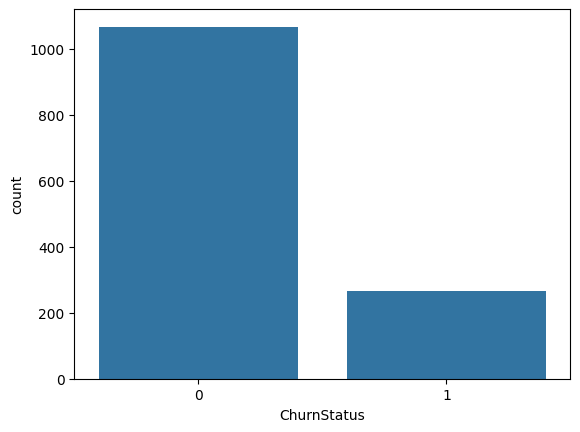

In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('rf', RandomForestClassifier(random_state=42))
])


In [138]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(pipe, xtrn1, ytrn1, cv=5, scoring='roc_auc')
print("CV ROC AUC scores:", cv_scores)
print("Mean CV ROC AUC:", cv_scores.mean())


CV ROC AUC scores: [0.76385168 0.69539037 0.67718378 0.73305445 0.74865286]
Mean CV ROC AUC: 0.7236266289866056


In [139]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 5, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['sqrt', 'log2', None]
}

grid = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid.fit(xtrn1, ytrn1)

print("Best params:", grid.best_params_)
print("Best CV ROC AUC:", grid.best_score_)

Best params: {'rf__max_depth': None, 'rf__max_features': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 300}
Best CV ROC AUC: 0.7404050134278349


In [140]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

best_model = grid.best_estimator_

y_pred = best_model.predict(xtst1)
y_prob = best_model.predict_proba(xtst1)[:, 1]

print("Test ROC AUC:", roc_auc_score(ytst1, y_prob))
print(classification_report(ytst1, y_pred))
print("Confusion matrix:\n", confusion_matrix(ytst1, y_pred))

Test ROC AUC: 0.8131067961165049
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       206
           1       0.89      0.39      0.55        61

    accuracy                           0.85       267
   macro avg       0.87      0.69      0.73       267
weighted avg       0.86      0.85      0.83       267

Confusion matrix:
 [[203   3]
 [ 37  24]]


In [141]:
importances = best_model.named_steps['rf'].feature_importances_
feature_importance = pd.Series(importances, index=dfmx.columns).sort_values(ascending=False)
print(feature_importance)

total_amount_bc_scaled       0.265941
Age_scaled                   0.204968
LoginFrequency_scaled        0.191983
countoftransaction_scaled    0.083520
cat__M                       0.031633
cat__Single                  0.028899
cat__Medium                  0.028497
cat__Online Banking          0.026895
cat__High                    0.025082
cat__Widowed                 0.024852
cat__Resolved                0.023850
cat__Website                 0.023221
cat__Married                 0.020987
cat__Unresolved              0.019672
dtype: float64
